# Explore and clean MorningStar fund data

## Load Data

In [114]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_colwidth = 100

In [115]:
fund_1 = pd.read_csv('./Fund Data (1).csv')
fund_2 = pd.read_csv('./Fund Data (2).csv')

## Cleaning Fund Data (1)

In [116]:
#check basic dataframe info.
fund_1.info()
fund_1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7062 entries, 0 to 7061
Data columns (total 18 columns):
SHARECLASS_ID               7062 non-null object
SHARECLASS_NAME             7062 non-null object
FUND_NAME                   7062 non-null object
SHARE_CLASS_COUNTER         7062 non-null int64
FUND_FAMILY_NAME            7062 non-null object
MSTAR_CATEGORY_NAME         7062 non-null object
MSTAR_GLOB_CATEGORY_NAME    7062 non-null object
MSTAR_BROAD_CATEGORY        7062 non-null object
COMMON_SOURCE_SYSTEM        7062 non-null object
RETURN_NET_1M               7062 non-null object
RETURN_NET_2M               7062 non-null object
RETURN_NET_3M               7062 non-null object
RETURN_NET_6M               7062 non-null float64
RETURN_NET_1Y               7062 non-null float64
RETURN_NET_2Y               7062 non-null float64
RETURN_NET_3Y               7062 non-null float64
RETURN_NET_4Y               7062 non-null float64
RETURN_NET_5Y               7062 non-null float64
dtypes

,SHARECLASS_ID,SHARECLASS_NAME,FUND_NAME,SHARE_CLASS_COUNTER,FUND_FAMILY_NAME,MSTAR_CATEGORY_NAME,MSTAR_GLOB_CATEGORY_NAME,MSTAR_BROAD_CATEGORY,COMMON_SOURCE_SYSTEM,RETURN_NET_1M,RETURN_NET_2M,RETURN_NET_3M,RETURN_NET_6M,RETURN_NET_1Y,RETURN_NET_2Y,RETURN_NET_3Y,RETURN_NET_4Y,RETURN_NET_5Y
0,FVUSA04ADJ,1290 VT Socially Responsible Portfolio Class IA,1290 VT Socially Responsible Portfolio,1,AXA Equitable,Large Blend,US Equity Large Cap Growth,EQUITY,FO_USA,2.32,4.73,4.49,8.61,22.82,11.81,9.80,11.49,14.95
1,FVUSA001AQ,1290 VT Socially Responsible Portfolio Class IB,1290 VT Socially Responsible Portfolio,2,AXA Equitable,Large Blend,US Equity Large Cap Growth,EQUITY,FO_USA,2.36,4.73,4.49,8.59,22.83,11.83,9.82,11.49,14.95
2,F00000M8U5,ABC-CA CSI 300 Index Equity Fund,ABC-CA CSI 300 Index Equity Fund,1,ABC-CA Fund Mgmt Co.,Equity Funds,Greater China Equity,Equity,ASIA-PACIFIC,4.04,4.47,6.89,17.54,21.14,8.27,17.99,15.28,13.59
3,F00000N9TF,ABC-CA CSI 500 Index Equity Fund,ABC-CA CSI 500 Index Equity Fund,1,ABC-CA Fund Mgmt Co.,Equity Funds,Greater China Equity,Equity,ASIA-PACIFIC,-0.72,1.11,3.59,5.16,0.70,-3.88,7.83,13.23,13.82
4,F0000000IA,ABF Hong Kong Bond Index Fund,ABF Hong Kong Bond Index Fund,1,HSBC Investment Fund,HKD Bond,Asia Fixed Income,Fixed Income,FE_ALL,-0.5,-1.27,-0.9,-0.63,-1.34,0.47,1.12,1.20,0.54
5,F000000AFM,ABF Malaysia Bond Index,ABF Malaysia Bond Index,1,AmFunds Management B,Bonds - Malaysia,Malaysia Fixed Income,Fixed Income,FE_ALL,-0.3,0.11,0.79,1.89,1.65,3.83,3.51,3.30,3.10
6,F0000000I9,ABF Pan Asia Bond Index,ABF Pan Asia Bond Index,1,State Street Global,Asia Bond - Local Currency,Asia Fixed Income,Fixed Income,FE_ALL,-0.28,-0.57,-0.04,2.59,-0.02,2.35,0.20,0.67,0.33
7,F0000026RB,ABF Philippines Bond Index Fund,ABF Philippines Bond Index Fund,1,BPI Asset Management,Other Bond,Other Fixed Income,Fixed Income,ASIA-PACIFIC,-0.29,0.09,0.6,1.63,-0.89,0.96,1.76,1.62,3.66
8,F0HKG070AD,ABF Singapore Bond Index Fd,ABF Singapore Bond Index Fd,1,Nikko Asset Manageme,SGD Bond,Asia Fixed Income,Fixed Income,FE_ALL,-0.03,-0.4,-0.22,0.33,-0.01,2.67,2.18,2.04,1.21
9,F00000UJFD,ACTIAM Responsible Index Fund Equity - Europe,ACTIAM Responsible Index Fund Equity - Europe,1,ACTIAM N.V.,Europe Large-Cap Blend Equity,Europe Equity Large Cap,Equity,EUROPE,1.86,5.82,5,4.11,20.28,6.35,8.72,8.50,11.04


#### Observation:  

All columns can be classfied into either numerics or strings. We will cast explicitly each column to its supposed  data type. It is clear that there are some non-numerical entries in column RETURN_NET_1M, RETURN_NET_2M and RETURN_NET_3M. 

In [117]:
#check non-numerical entries in 'RETURN_NET_1M' column. It seems like there are some string formatted numbers.
fund_1[~fund_1['RETURN_NET_1M'].str.isnumeric()]['RETURN_NET_1M'][0]

'2.32'

In [118]:
#convert str format into float, else to NaN.
numeric_columns = ['RETURN_NET_1M', 'RETURN_NET_2M', 'RETURN_NET_3M']
fund_1[numeric_columns] = fund_1[numeric_columns].apply(pd.to_numeric, errors = 'coerce')

In [119]:
#check null entries.
fund_1.isnull().sum()

SHARECLASS_ID                0
SHARECLASS_NAME              0
FUND_NAME                    0
SHARE_CLASS_COUNTER          0
FUND_FAMILY_NAME             0
MSTAR_CATEGORY_NAME          0
MSTAR_GLOB_CATEGORY_NAME     0
MSTAR_BROAD_CATEGORY         0
COMMON_SOURCE_SYSTEM         0
RETURN_NET_1M               15
RETURN_NET_2M               15
RETURN_NET_3M               15
RETURN_NET_6M                0
RETURN_NET_1Y                0
RETURN_NET_2Y                0
RETURN_NET_3Y                0
RETURN_NET_4Y                0
RETURN_NET_5Y                0
dtype: int64

In [120]:
#remove leading or trailing spaces if data type are 'object'
fund_1 = fund_1.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [121]:
#given some numerical values contain '<null>', we want to check if categorial columns contain similar null entries.
categorical_columns = ['SHARECLASS_ID', \
                       'SHARECLASS_NAME',\
                       'FUND_NAME', \
                       'FUND_FAMILY_NAME', \
                       'MSTAR_CATEGORY_NAME', \
                       'MSTAR_GLOB_CATEGORY_NAME', \
                       'MSTAR_BROAD_CATEGORY', \
                       'COMMON_SOURCE_SYSTEM']

categorical_null = pd.DataFrame([[len(fund_1[fund_1[column].str.contains('null')]) for column in categorical_columns]], columns =categorical_columns) 
categorical_null

,SHARECLASS_ID,SHARECLASS_NAME,FUND_NAME,FUND_FAMILY_NAME,MSTAR_CATEGORY_NAME,MSTAR_GLOB_CATEGORY_NAME,MSTAR_BROAD_CATEGORY,COMMON_SOURCE_SYSTEM
0,0,0,0,0,0,0,0,0


#### Observation:  

There are only 15 out of 7000+ entries are null for numerical columns and no null entries for categorical columns. Data are not sparse. 

,SHARECLASS_ID,SHARECLASS_NAME,FUND_NAME,SHARE_CLASS_COUNTER,FUND_FAMILY_NAME,MSTAR_CATEGORY_NAME,MSTAR_GLOB_CATEGORY_NAME,MSTAR_BROAD_CATEGORY,COMMON_SOURCE_SYSTEM,RETURN_NET_1M,RETURN_NET_2M,RETURN_NET_3M,RETURN_NET_6M,RETURN_NET_1Y,RETURN_NET_2Y,RETURN_NET_3Y,RETURN_NET_4Y,RETURN_NET_5Y
0,7059,7059,4858,16,505,440,83,7,11,1420,1931,1927,2631,3648,2803,2415,2421,2709


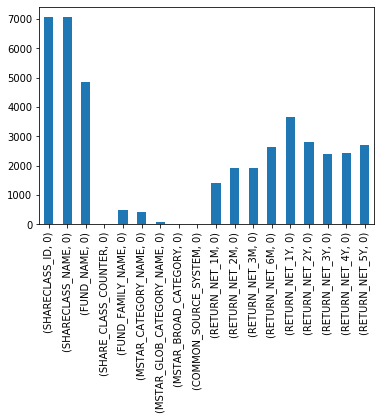

In [122]:
#check unique counts for all columns.
unique_count = pd.DataFrame([[len(fund_1[i].unique()) for i in fund_1.columns]],columns = fund_1.columns)
unique_count.unstack().plot.bar()
unique_count

#### Observation:  

It is clear that SHARECLASS_ID is the unique identifier. But unique counts for SHARECLASS_ID is less than the total number of rows. There could be duplicates and we will remove those.  

MSTAR_BROAD_CATEGORY has the fewest number of unique values.

It is also interesting to see that the number of unique values in return columns are much less than the total number of funds. This suggests many funds could have similar return profiles. These funds might share similar benchmarks.   

In [123]:
#check duplicates.
fund_1[fund_1.duplicated()]

,SHARECLASS_ID,SHARECLASS_NAME,FUND_NAME,SHARE_CLASS_COUNTER,FUND_FAMILY_NAME,MSTAR_CATEGORY_NAME,MSTAR_GLOB_CATEGORY_NAME,MSTAR_BROAD_CATEGORY,COMMON_SOURCE_SYSTEM,RETURN_NET_1M,RETURN_NET_2M,RETURN_NET_3M,RETURN_NET_6M,RETURN_NET_1Y,RETURN_NET_2Y,RETURN_NET_3Y,RETURN_NET_4Y,RETURN_NET_5Y
477,F0GBR04L7T,BNY Mellon Global Funds PLC - BNY Mellon S&P 500 Index Tracker EUR A Acc,BNY Mellon Global Funds PLC - BNY Mellon S&P 500 Index Tracker,1,BNY Mellon Global Ma,US Large-Cap Blend Equity,US Equity Large Cap Blend,Equity,EUROPE,3.73,6.5,6.01,1.16,14.56,8.48,11.44,14.65,15.55
478,F0GBR04L7T,BNY Mellon Global Funds PLC - BNY Mellon S&P 500 Index Tracker EUR A Acc,BNY Mellon Global Funds PLC - BNY Mellon S&P 500 Index Tracker,1,BNY Mellon Global Ma,US Large-Cap Blend Equity,US Equity Large Cap Blend,Equity,EUROPE,3.73,6.5,6.01,1.16,14.56,8.48,11.44,14.65,15.55
479,F0GBR04L7T,BNY Mellon Global Funds PLC - BNY Mellon S&P 500 Index Tracker EUR A Acc,BNY Mellon Global Funds PLC - BNY Mellon S&P 500 Index Tracker,1,BNY Mellon Global Ma,US Large-Cap Blend Equity,US Equity Large Cap Blend,Equity,EUROPE,3.73,6.5,6.01,1.16,14.56,8.48,11.44,14.65,15.55


In [124]:
#remove duplicates.
fund_1.drop_duplicates(inplace= True)

### Categorial columns analysis

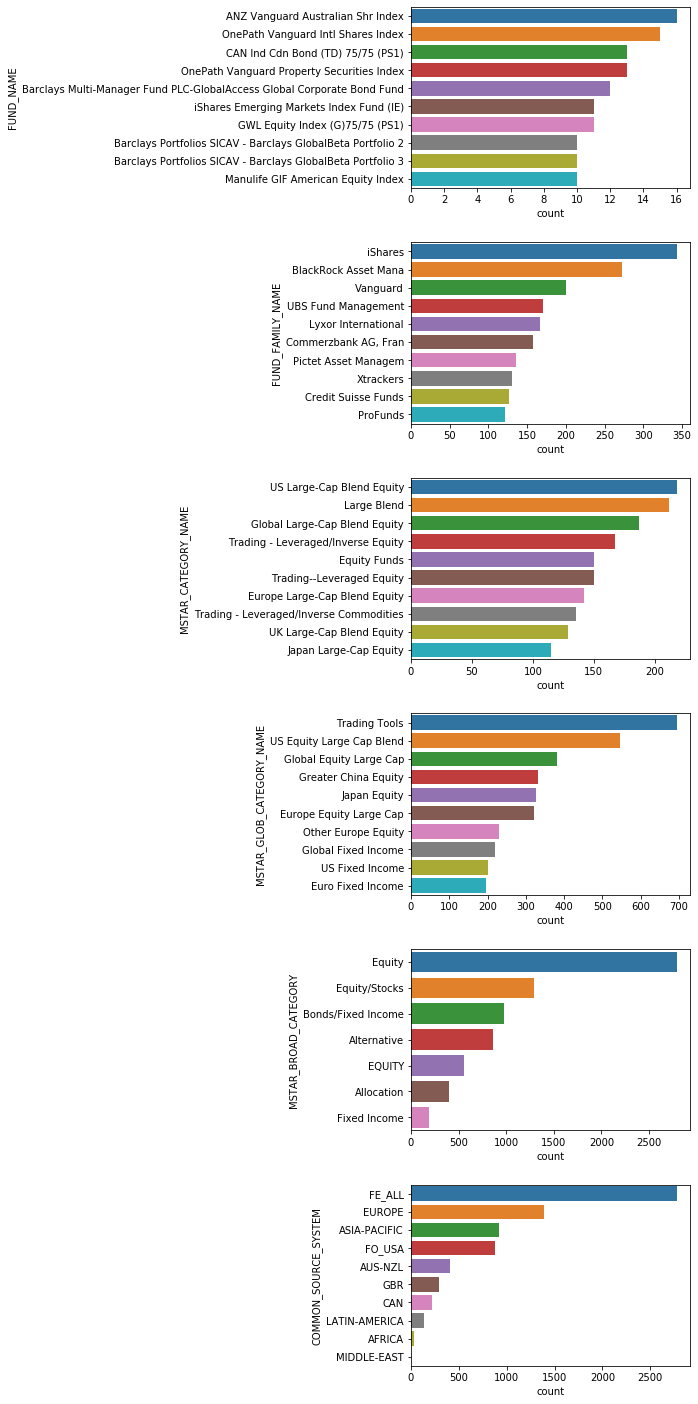

In [125]:
#check top 10 frequent values within each categorical columns.

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(5,25))
for i, column in enumerate(categorical_columns[2:]):
    ax = sns.countplot(y = column, data= fund_1, order = fund_1[column].value_counts().iloc[:10].index , ax=axes[i])
    plt.subplots_adjust(hspace = 0.3)


#### Observation:

It is clear that for MSTAR_BROAD_CATEGORY columns, we could combine values with same meaning.

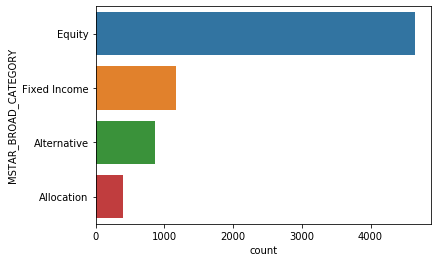

In [126]:
#combine values with same meaning.
colv_to_change = {'EQUITY': 'Equity', 'Equity/Stocks': 'Equity', 'Bonds/Fixed Income': 'Fixed Income'}
fund_1['MSTAR_BROAD_CATEGORY'] = fund_1['MSTAR_BROAD_CATEGORY'].replace(colv_to_change)
sns.countplot(y = 'MSTAR_BROAD_CATEGORY', data= fund_1, order = fund_1['MSTAR_BROAD_CATEGORY'].value_counts().index)

In [127]:
#for each categorical classification columns, check the number of unique values divided by total number of data points.
fund_1[categorical_columns[2:]].nunique()/fund_1[categorical_columns[2:]].count()

FUND_NAME                   0.688199
FUND_FAMILY_NAME            0.071540
MSTAR_CATEGORY_NAME         0.062332
MSTAR_GLOB_CATEGORY_NAME    0.011758
MSTAR_BROAD_CATEGORY        0.000567
COMMON_SOURCE_SYSTEM        0.001558
dtype: float64

#### Observation:

It looks like Fund_NAME could contain redundant information similar to SHARECLASS_NAME as its unique counts over total data points ratio is close to 70%. We should discuss further if it makes sense to drop this column.

### Numerical columns analysis

In [128]:
numerical_columns = ['RETURN_NET_1M', \
                     'RETURN_NET_2M', \
                     'RETURN_NET_3M', \
                     'RETURN_NET_6M', \
                     'RETURN_NET_1Y', \
                     'RETURN_NET_2Y', \
                     'RETURN_NET_3Y', \
                     'RETURN_NET_4Y', \
                     'RETURN_NET_5Y']

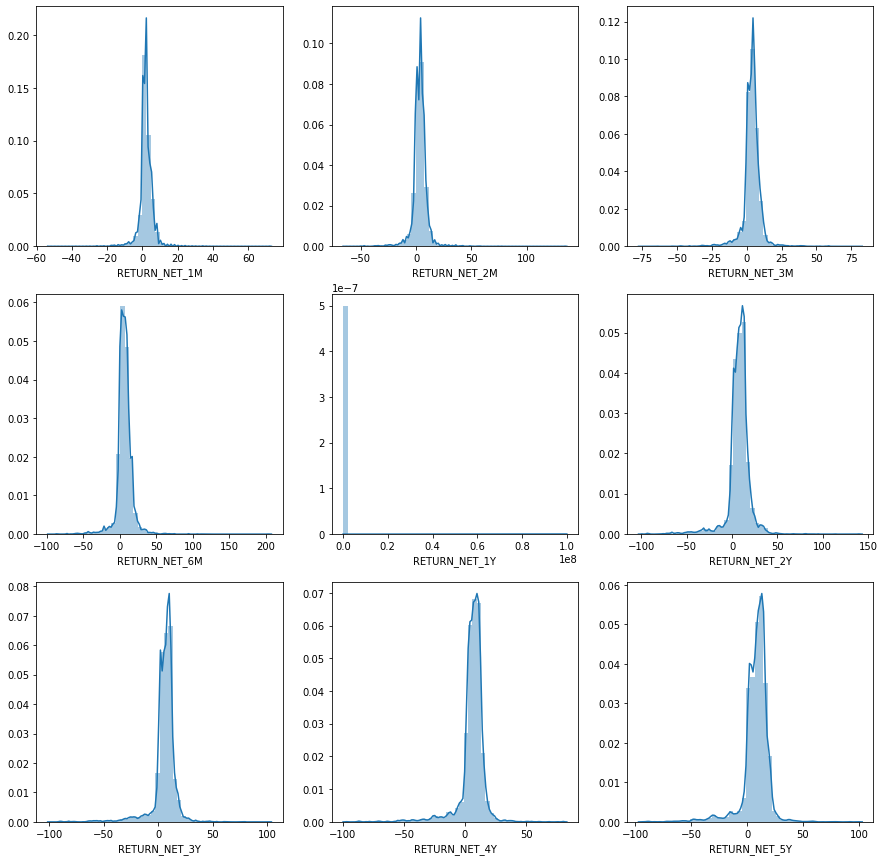

In [129]:
#distribution plot for all return columns.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i, column in enumerate(numerical_columns):
    sns.distplot(fund_1[column].dropna(), ax=axes[i//3,i%3])

#### Observation:  

All returns columns have values in the range of -200 to 200, with centers slighly skewed to the right of 0, except for RETURN_NET_1Y column. RETURN_NET_1Y column has some extremely large numbers. There could be outliers within this column. We want to check rows with 'RETURN_NET_1Y' > 200.

In [130]:
fund_1[fund_1['RETURN_NET_1Y']>200].head()

,SHARECLASS_ID,SHARECLASS_NAME,FUND_NAME,SHARE_CLASS_COUNTER,FUND_FAMILY_NAME,MSTAR_CATEGORY_NAME,MSTAR_GLOB_CATEGORY_NAME,MSTAR_BROAD_CATEGORY,COMMON_SOURCE_SYSTEM,RETURN_NET_1M,RETURN_NET_2M,RETURN_NET_3M,RETURN_NET_6M,RETURN_NET_1Y,RETURN_NET_2Y,RETURN_NET_3Y,RETURN_NET_4Y,RETURN_NET_5Y
394,F0GBR06SU1,Avanza Zero,Avanza Zero- Den avgiftsfria fonden,1,Avanza Fonder,Sweden Equity,Other Europe Equity,Equity,EUROPE,2.27,8.31,8.24,3.49,1.000000e+08,9.67,9.70,10.82,13.86
1026,F00000PQV0,Commerzbank ETN -1x VSTOXXF Daily Short,Commerzbank ETN -1x VSTOXXF Daily Short,1,"Commerzbank AG, Fran",Trading - Leveraged/Inverse Other,Trading Tools,Alternative,FE_ALL,16.45,55.96,33.21,93.99,3.974100e+02,86.11,8.28,2.37,17.96
1037,F00000PQUZ,Commerzbank ETN -2x VSTOXXF Daily Short,Commerzbank ETN -2x VSTOXXF Daily Short,1,"Commerzbank AG, Fran",Trading - Leveraged/Inverse Other,Trading Tools,Alternative,FE_ALL,34.04,133.98,58.14,203.93,1.700060e+03,30.02,-51.98,-49.50,-25.05
1091,F00000PU4Z,Commerzbank ETN 3x TECDAXF Daily Long,Commerzbank ETN 3x TECDAXF Daily Long,1,"Commerzbank AG, Fran",Trading - Leveraged/Inverse Equity,Trading Tools,Alternative,FE_ALL,13.72,36.23,40.72,74.37,2.045400e+02,50.51,79.19,61.45,76.51
1100,F00000PT9D,Commerzbank ETN 4x TECDAXF Daily Long,Commerzbank ETN 4x TECDAXF Daily Long,1,"Commerzbank AG, Fran",Trading - Leveraged/Inverse Equity,Trading Tools,Alternative,FE_ALL,18.44,50.49,56.50,106.20,3.265000e+02,60.82,100.89,75.60,98.96


#### Obervation:  

These share classes with 1yr return larger than 200% are all leveraged ETNs except for 'Avanza Zero'. It has 1yr return of 1e8, which could be an outlier. We will replace it with NaN.

    

In [131]:
#change outlier number into nan.
fund_1.loc[394,['RETURN_NET_1Y']] = np.nan

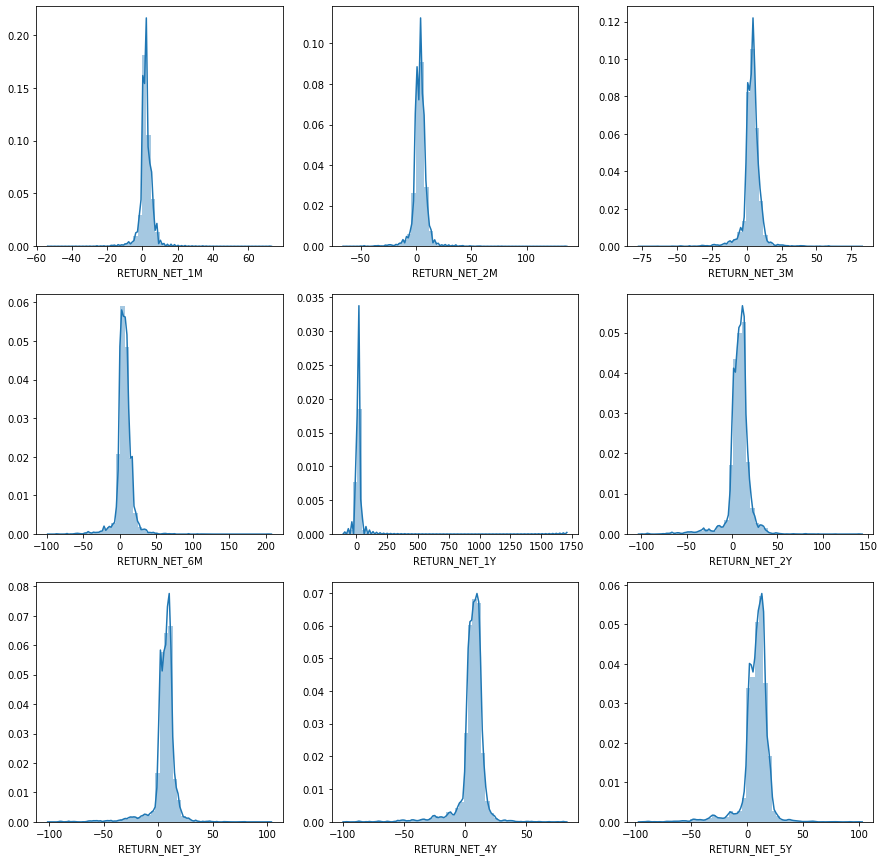

In [132]:
#check distribution plot again after we remove the outlier
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i, column in enumerate(numerical_columns):
    sns.distplot(fund_1[column].dropna(), ax=axes[i//3,i%3])

#### Observation:

After we remove the outlier, we still see RETURN_NET_1Y has large positive skewness contributed from a fund named **'Commerzbank ETN -2x VSTOXXF Daily Short'**. It could be due to the nature of the leveraged ETF return, which has large volatilities. We might need to investigate further using additional data to verify if there is any data quality related to this particular fund.

,SHARECLASS_ID,SHARECLASS_NAME,FUND_NAME,SHARE_CLASS_COUNTER,FUND_FAMILY_NAME,MSTAR_CATEGORY_NAME,MSTAR_GLOB_CATEGORY_NAME,MSTAR_BROAD_CATEGORY,COMMON_SOURCE_SYSTEM,RETURN_NET_1M,RETURN_NET_2M,RETURN_NET_3M,RETURN_NET_6M,RETURN_NET_1Y,RETURN_NET_2Y,RETURN_NET_3Y,RETURN_NET_4Y,RETURN_NET_5Y
31,FOUSA00JEV,AMIDEX35 Israel Fund Class A,AMIDEX35 Israel Fund,1,AMIDEX,Miscellaneous Region,Other Equity,Equity,FO_USA,-0.83,1.71,-1.84,-0.37,10.32,-3.38,-1.72,0.74,2.96
32,FOUSA00G2F,AMIDEX35 Israel Fund Class C,AMIDEX35 Israel Fund,2,AMIDEX,Miscellaneous Region,Other Equity,Equity,FO_USA,-0.94,1.52,-2.13,-0.81,9.39,-4.15,-2.46,-0.03,2.18
33,FOUSA00K5J,AMIDEX35 Israel Mutual Fund,AMIDEX35 Israel Fund,3,AMIDEX,Miscellaneous Region,Other Equity,Equity,FO_USA,-0.85,1.68,-1.97,-0.36,10.27,-3.37,-1.71,0.75,2.97


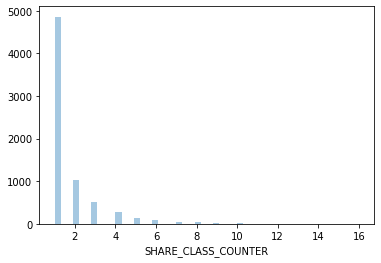

In [133]:
#check distribution of share class counter
sns.distplot(fund_1['SHARE_CLASS_COUNTER'], kde = False)
check_fund_name = fund_1[fund_1['SHARE_CLASS_COUNTER'] > 2].iloc[0].FUND_NAME
fund_1[fund_1['FUND_NAME']==check_fund_name]

#### Observation

For shareclass_id with share class counter greater than 1, they seem to have same FUND_NAME, FUND_FAMILY_NAME, MSTAR_CATEGORY_NAME, MSTAR_GLOB_CATEGORY_NAME, MSTAR_BROAD_CATEGORY, COMMON_SOURCE_SYSTEM. Let's check if that is the case.

In [134]:
#check unique counts across columns for all IDs with class counter greater than 1
multi_class_fund_name = fund_1[fund_1['SHARE_CLASS_COUNTER'] > 1].FUND_NAME.unique()
column_to_check = ['FUND_NAME', 'FUND_FAMILY_NAME', 'MSTAR_CATEGORY_NAME', 'MSTAR_GLOB_CATEGORY_NAME', 'MSTAR_BROAD_CATEGORY', 'COMMON_SOURCE_SYSTEM']

In [135]:
multi_class_fund = fund_1[fund_1['FUND_NAME'].isin(multi_class_fund_name)]
multi_class_unique = multi_class_fund.groupby(['FUND_NAME'])[column_to_check].nunique()

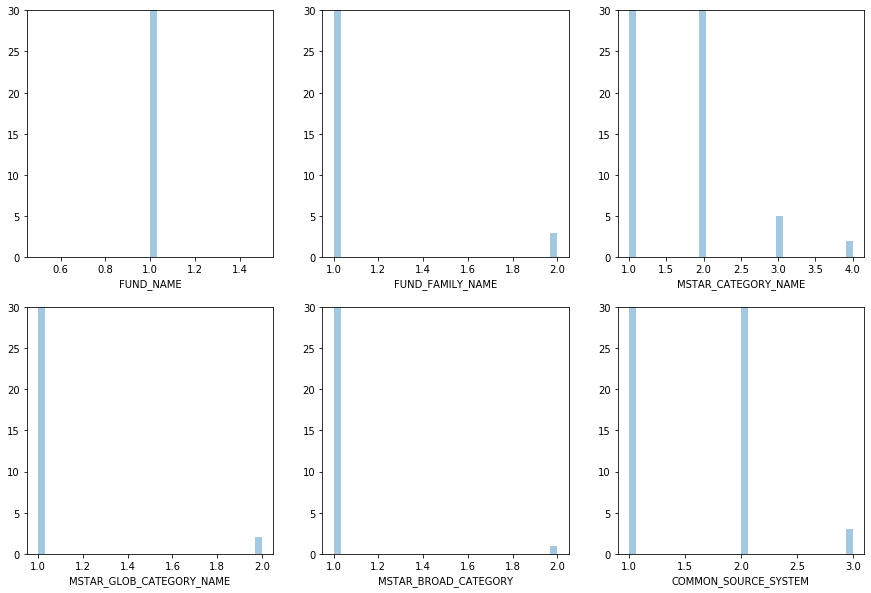

In [136]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
for i, column in enumerate(column_to_check):
    ax = sns.distplot(multi_class_unique[column], ax=axes[i//3,i%3], kde = False)
    ax.set(ylim=(0, 30))

#### Observations:

It looks like some shareclass_id with share_class_counter greater than 1 have different 'FUND_FAMILY_NAME', 'MSTAR_CATEGORY_NAME', 'MSTAR_GLOB_CATEGORY_NAME', 'MSTAR_BROAD_CATEGORY' and 'COMMON_SOURCE_SYSTEM'. Let's take a look at these funds. 

In [137]:
multi_class_unique[multi_class_unique['MSTAR_CATEGORY_NAME']>1].head()

,FUND_NAME,FUND_FAMILY_NAME,MSTAR_CATEGORY_NAME,MSTAR_GLOB_CATEGORY_NAME,MSTAR_BROAD_CATEGORY,COMMON_SOURCE_SYSTEM
FUND_NAME,,,,,,
Barclays Multi-Manager Fund PLC-GlobalAccess Global Corporate Bond Fund,1,1,3,1,1,1
Barclays Multi-Manager Fund PLC-GlobalAccess Japan Fund,1,1,2,1,1,1
Barclays Portfolios SICAV - Barclays GlobalBeta Portfolio 2,1,1,4,1,1,1
Barclays Portfolios SICAV - Barclays GlobalBeta Portfolio 3,1,1,4,1,1,1
CITIC Prudential CSI300 Index Fund,1,1,2,1,1,1


In [138]:
fund_1[fund_1['FUND_NAME'] == 'Barclays Multi-Manager Fund PLC-GlobalAccess Global Corporate Bond Fund'].head()

,SHARECLASS_ID,SHARECLASS_NAME,FUND_NAME,SHARE_CLASS_COUNTER,FUND_FAMILY_NAME,MSTAR_CATEGORY_NAME,MSTAR_GLOB_CATEGORY_NAME,MSTAR_BROAD_CATEGORY,COMMON_SOURCE_SYSTEM,RETURN_NET_1M,RETURN_NET_2M,RETURN_NET_3M,RETURN_NET_6M,RETURN_NET_1Y,RETURN_NET_2Y,RETURN_NET_3Y,RETURN_NET_4Y,RETURN_NET_5Y
524,F00000O02X,Barclays Multi-Manager Fund - GlobalAccess Global Corporate Bond Fund A GBP Distribution,Barclays Multi-Manager Fund PLC-GlobalAccess Global Corporate Bond Fund,1,Barclays Bank PLC,Global Corporate Bond - GBP Hedged,Global Fixed Income,Fixed Income,EUROPE,0.55,0.12,0.80,1.94,2.14,4.05,3.30,3.57,3.04
525,F00000NNNS,Barclays Multi-Manager Fund - GlobalAccess Global Corporate Bond Fund A USD Accumulation,Barclays Multi-Manager Fund PLC-GlobalAccess Global Corporate Bond Fund,2,Barclays Bank PLC,Global Corporate Bond - USD Hedged,Global Fixed Income,Fixed Income,EUROPE,0.69,0.46,1.15,2.57,3.29,4.80,3.69,3.85,3.25
526,F00000JVSL,Barclays Multi-Manager Fund - GlobalAccess Global Corporate Bond Fund B EUR Accumulation,Barclays Multi-Manager Fund PLC-GlobalAccess Global Corporate Bond Fund,3,Barclays Bank PLC,Global Corporate Bond - EUR Hedged,Global Fixed Income,Fixed Income,EUROPE,0.51,0.10,0.61,1.64,1.53,3.44,2.76,3.21,2.70
527,F00000O02Y,Barclays Multi-Manager Fund - GlobalAccess Global Corporate Bond Fund B EUR Distribution,Barclays Multi-Manager Fund PLC-GlobalAccess Global Corporate Bond Fund,4,Barclays Bank PLC,Global Corporate Bond - EUR Hedged,Global Fixed Income,Fixed Income,EUROPE,0.46,0.08,0.54,1.60,1.58,3.39,2.68,3.13,2.63
528,F00000JVSI,Barclays Multi-Manager Fund - GlobalAccess Global Corporate Bond Fund B GBP Distribution,Barclays Multi-Manager Fund PLC-GlobalAccess Global Corporate Bond Fund,5,Barclays Bank PLC,Global Corporate Bond - GBP Hedged,Global Fixed Income,Fixed Income,EUROPE,0.53,0.18,0.84,2.00,2.33,4.27,3.47,3.81,3.25


## Cleaning Fund Data (2)

In [139]:
#check basic dataframe info
fund_2.info()
fund_2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7061 entries, 0 to 7060
Data columns (total 12 columns):
SHARECLASS_ID      7061 non-null object
SHARECLASS_NAME    7061 non-null object
FUND_NAME          7061 non-null object
CATEGORY           7061 non-null object
SHARPE_RATIO_1Y    7061 non-null object
SHARPE_RATIO_3Y    7061 non-null object
SHARPE_RATIO_5Y    7061 non-null object
BETA_1Y            7061 non-null object
BETA_3Y            7061 non-null object
BETA_5Y            7061 non-null object
INFO_RATIO_3Y      7061 non-null object
INFO_RATIO_5Y      7061 non-null object
dtypes: object(12)
memory usage: 662.0+ KB


,SHARECLASS_ID,SHARECLASS_NAME,FUND_NAME,CATEGORY,SHARPE_RATIO_1Y,SHARPE_RATIO_3Y,SHARPE_RATIO_5Y,BETA_1Y,BETA_3Y,BETA_5Y,INFO_RATIO_3Y,INFO_RATIO_5Y
0,FVUSA04ADJ,1290 VT Socially Responsible Portfolio Class IA,1290 VT Socially Responsible Portfolio,Equity,4.92,0.89,1.43,0.85,0.97,0.97,-0.78,-0.40272
1,FVUSA001AQ,1290 VT Socially Responsible Portfolio Class IB,1290 VT Socially Responsible Portfolio,Equity,4.86,0.89,1.43,0.86,0.97,0.97,-0.78,-0.40147
2,F00000M8U5,ABC-CA CSI 300 Index Equity Fund,ABC-CA CSI 300 Index Equity Fund,Equity,1.82,0.71,0.61,1.16,1.01,1.04,0.79,0.72641
3,F00000N9TF,ABC-CA CSI 500 Index Equity Fund,ABC-CA CSI 500 Index Equity Fund,Equity,0.02,0.38,0.59,0.87,0.88,0.94,-0.23,0.23188
4,F0000000IA,ABF Hong Kong Bond Index Fund,ABF Hong Kong Bond Index Fund,Equity,-0.79,0.21,0.04,0.84,0.86,<null>,-1.99,<null>
5,F000000AFM,ABF Malaysia Bond Index,ABF Malaysia Bond Index,Equity,0.15,0.92,0.96,1.02,<null>,<null>,<null>,<null>
6,F0000000I9,ABF Pan Asia Bond Index,ABF Pan Asia Bond Index,Equity,-0.16,-0.04,0,1,1.17,<null>,-0.58,<null>
7,F0000026RB,ABF Philippines Bond Index Fund,ABF Philippines Bond Index Fund,Equity,-0.47,0.28,0.55,0.8,0.92,<null>,-0.66,<null>
8,F0HKG070AD,ABF Singapore Bond Index Fd,ABF Singapore Bond Index Fd,Equity,-0.32,0.43,0.21,1.05,<null>,<null>,<null>,<null>
9,F00000UJFD,ACTIAM Responsible Index Fund Equity - Europe,ACTIAM Responsible Index Fund Equity - Europe,Equity,2.52,0.73,0.99,1,1,1,1.68,1.43893


#### Obervations:

On a summary level, it is clear that we can separate the data columns into categorical or numerical values.

Although a rough glance of the dataframe info shows the data does not have any null value, a detailed review of the dataframe shows some null values in string format. We will handle these null values and cast them into proper formats. 



In [140]:
#cast numerical columns into float type.
numerical_columns = ['SHARPE_RATIO_1Y', 'SHARPE_RATIO_3Y', 'SHARPE_RATIO_5Y', 'BETA_1Y','BETA_3Y','BETA_5Y','INFO_RATIO_3Y','INFO_RATIO_5Y']
fund_2[numerical_columns] = fund_2[numerical_columns].apply(pd.to_numeric, errors = 'coerce')

In [141]:
#check data sparsity 
fund_2.isnull().sum()/fund_2.count()

SHARECLASS_ID      0.000000
SHARECLASS_NAME    0.000000
FUND_NAME          0.000000
CATEGORY           0.000000
SHARPE_RATIO_1Y    0.002271
SHARPE_RATIO_3Y    0.002129
SHARPE_RATIO_5Y    0.002129
BETA_1Y            0.021852
BETA_3Y            0.223108
BETA_5Y            0.224592
INFO_RATIO_3Y      0.223108
INFO_RATIO_5Y      0.224592
dtype: float64

#### Observation:

It is clear that fund data (2) are sparser than fund data (1) as the percentages of null numbers are much higher across columns.

In [142]:
#check if there is any duplicated row. It does not have any duplicated row.
fund_2[fund_2.duplicated()]


,SHARECLASS_ID,SHARECLASS_NAME,FUND_NAME,CATEGORY,SHARPE_RATIO_1Y,SHARPE_RATIO_3Y,SHARPE_RATIO_5Y,BETA_1Y,BETA_3Y,BETA_5Y,INFO_RATIO_3Y,INFO_RATIO_5Y


In [143]:
#remove leading and trailing spaces for object type columns. 
fund_2 = fund_2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [144]:
fund_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7061 entries, 0 to 7060
Data columns (total 12 columns):
SHARECLASS_ID      7061 non-null object
SHARECLASS_NAME    7061 non-null object
FUND_NAME          7061 non-null object
CATEGORY           7061 non-null object
SHARPE_RATIO_1Y    7045 non-null float64
SHARPE_RATIO_3Y    7046 non-null float64
SHARPE_RATIO_5Y    7046 non-null float64
BETA_1Y            6910 non-null float64
BETA_3Y            5773 non-null float64
BETA_5Y            5766 non-null float64
INFO_RATIO_3Y      5773 non-null float64
INFO_RATIO_5Y      5766 non-null float64
dtypes: float64(8), object(4)
memory usage: 662.0+ KB


,SHARECLASS_ID,SHARECLASS_NAME,FUND_NAME,CATEGORY,SHARPE_RATIO_1Y,SHARPE_RATIO_3Y,SHARPE_RATIO_5Y,BETA_1Y,BETA_3Y,BETA_5Y,INFO_RATIO_3Y,INFO_RATIO_5Y
0,7061,7061,4859,4,1028,403,457,658,543,521,674,5656


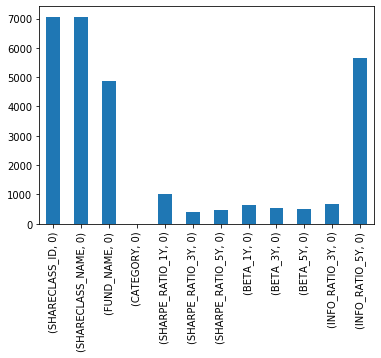

In [145]:
#check unique counts for all columns.
unique_count = pd.DataFrame([[len(fund_2[i].unique()) for i in fund_2.columns]],columns = fund_2.columns)
unique_count.unstack().plot.bar()
unique_count

### Processing categorical columns

In [146]:
categorical_columns = ['SHARECLASS_ID','SHARECLASS_NAME','FUND_NAME','CATEGORY']

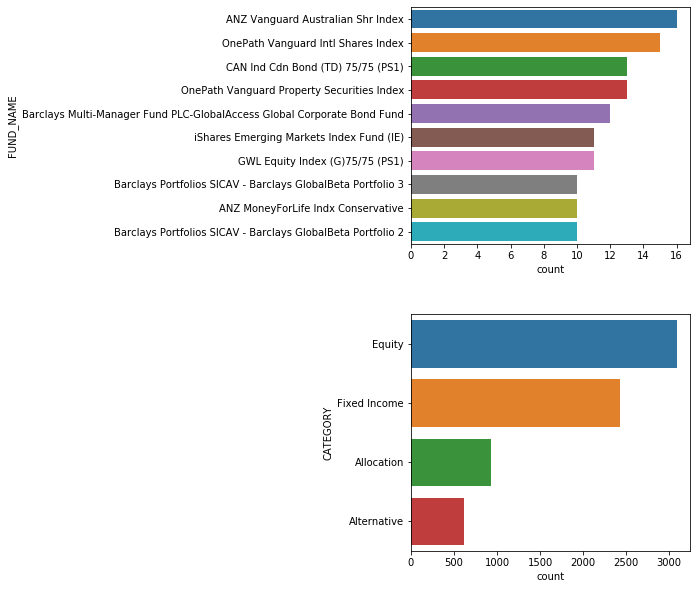

In [147]:
#check top 10 frequent values within each categorical columns.
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5,10))
for i, column in enumerate(categorical_columns[2:]):
    ax = sns.countplot(y = column, data= fund_2, order = fund_2[column].value_counts().iloc[:10].index , ax=axes[i])
    plt.subplots_adjust(hspace = 0.3)

#### Obervation:

The **'CATEGORY'** column has the same four values as column **'MSTAR_BROAD_CATEGORY'** in Fund Data (1). However, the distribution of the two looks different as there are clearly more counts for Fixed Income values for Fund Data (2). There could be some inconsistencies in classification from the two datasets.

In [148]:
#check SHARECLASS_IDs which are not in both data sets. fund_2 has 2 additional SHARECLASS_ID.

list1 = list(set(fund_2['SHARECLASS_ID']) - set(fund_1['SHARECLASS_ID']))
list2 = list(set(fund_1['SHARECLASS_ID']) - set(fund_2['SHARECLASS_ID']))
print(list1)
print(list2)

['F000005PCP', 'F000005PCQ']
[]


In [149]:
#merge fund_1 and fund_2 to check for consistency in classification between 'MSTAR_BROAD_CATEGORY' in fund_1 and 'CATEGORY' in fund_2.

fund_merged = fund_1.merge(fund_2, how = 'left', left_on = 'SHARECLASS_ID', right_on = 'SHARECLASS_ID')
fund_merged_dclass = fund_merged[fund_merged['MSTAR_BROAD_CATEGORY'] != fund_merged['CATEGORY']] 
print('Number of misclassified rows', len(fund_merged_dclass))
fund_merged_dclass.head()


Number of misclassified rows 4340


,SHARECLASS_ID,SHARECLASS_NAME_x,FUND_NAME_x,SHARE_CLASS_COUNTER,FUND_FAMILY_NAME,MSTAR_CATEGORY_NAME,MSTAR_GLOB_CATEGORY_NAME,MSTAR_BROAD_CATEGORY,COMMON_SOURCE_SYSTEM,RETURN_NET_1M,...,FUND_NAME_y,CATEGORY,SHARPE_RATIO_1Y,SHARPE_RATIO_3Y,SHARPE_RATIO_5Y,BETA_1Y,BETA_3Y,BETA_5Y,INFO_RATIO_3Y,INFO_RATIO_5Y
4,F0000000IA,ABF Hong Kong Bond Index Fund,ABF Hong Kong Bond Index Fund,1,HSBC Investment Fund,HKD Bond,Asia Fixed Income,Fixed Income,FE_ALL,-0.50,...,ABF Hong Kong Bond Index Fund,Equity,-0.79,0.21,0.04,0.84,0.86,NaN,-1.99,NaN
5,F000000AFM,ABF Malaysia Bond Index,ABF Malaysia Bond Index,1,AmFunds Management B,Bonds - Malaysia,Malaysia Fixed Income,Fixed Income,FE_ALL,-0.30,...,ABF Malaysia Bond Index,Equity,0.15,0.92,0.96,1.02,NaN,NaN,NaN,NaN
6,F0000000I9,ABF Pan Asia Bond Index,ABF Pan Asia Bond Index,1,State Street Global,Asia Bond - Local Currency,Asia Fixed Income,Fixed Income,FE_ALL,-0.28,...,ABF Pan Asia Bond Index,Equity,-0.16,-0.04,0.00,1.00,1.17,NaN,-0.58,NaN
7,F0000026RB,ABF Philippines Bond Index Fund,ABF Philippines Bond Index Fund,1,BPI Asset Management,Other Bond,Other Fixed Income,Fixed Income,ASIA-PACIFIC,-0.29,...,ABF Philippines Bond Index Fund,Equity,-0.47,0.28,0.55,0.80,0.92,NaN,-0.66,NaN
8,F0HKG070AD,ABF Singapore Bond Index Fd,ABF Singapore Bond Index Fd,1,Nikko Asset Manageme,SGD Bond,Asia Fixed Income,Fixed Income,FE_ALL,-0.03,...,ABF Singapore Bond Index Fd,Equity,-0.32,0.43,0.21,1.05,NaN,NaN,NaN,NaN


#### Observation: 

Looking at the merged data across different columns, it seems the Fund Data (2) have misclassification problem. We will assume 'MSTAR_BROAD_CATEGORY' from Fund Data (1) has the correct classification. We will map its classification into Fund Data (2). 

In [150]:
#replace CATEGORY values with MSTAR_BROAD_CATEGORY values from Fund Data (1) on matched SHARECLASS_ID. 
fund_2.set_index('SHARECLASS_ID', inplace = True)
fund_1.set_index('SHARECLASS_ID', inplace = True)

fund_2.update(pd.Series(fund_1['MSTAR_BROAD_CATEGORY'], name = 'CATEGORY'))

fund_2.reset_index(inplace = True)
fund_1.reset_index(inplace = True)


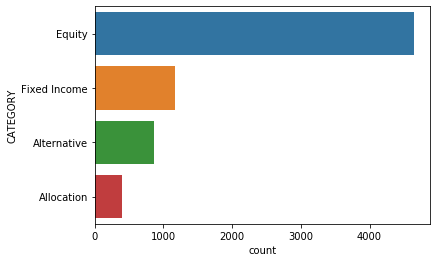

In [151]:
sns.countplot(y = 'CATEGORY' , data= fund_2, order = fund_2['CATEGORY'].value_counts().index)

### Processing numerical columns

In [152]:
numerical_columns = ['SHARPE_RATIO_1Y',\
                     'SHARPE_RATIO_3Y',\
                     'SHARPE_RATIO_5Y',\
                     'BETA_1Y',\
                     'BETA_3Y',\
                     'BETA_5Y',\
                     'INFO_RATIO_3Y',\
                     'INFO_RATIO_5Y']


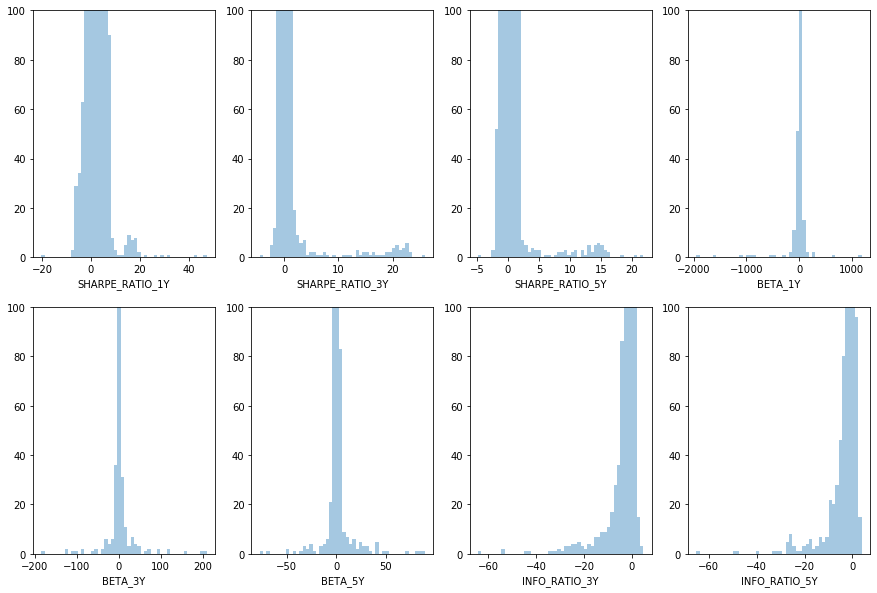

In [153]:
#check distribution plot for each numerical columns.
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,10))
for i, column in enumerate(numerical_columns):
    ax = sns.distplot(fund_2[column].dropna(), ax=axes[i//4,i%4], kde = False)
    ax.set(ylim = (0, 100))

#### Observation:

All columns have values centrally distributed around 0 with large skewness. It looks like there are some funds have extemely large sharpe ratios, beta values and info ratios. We will take a look at these data entries.

In [154]:
#check funds have large sharp ratio.
fund_2[np.abs(fund_2['SHARPE_RATIO_1Y'])>20].head()

,SHARECLASS_ID,SHARECLASS_NAME,FUND_NAME,CATEGORY,SHARPE_RATIO_1Y,SHARPE_RATIO_3Y,SHARPE_RATIO_5Y,BETA_1Y,BETA_3Y,BETA_5Y,INFO_RATIO_3Y,INFO_RATIO_5Y
775,F00000NAQZ,ChangSheng TongRui CSI 200 Classified Fund A,Changsheng Tongrui CSI 200 Trenched Fund,Equity,29.55,16.77,18.65,0.0,0.00,0.00,-0.44,-0.30742
1917,F00000NZWX,GF SZSE 100 Index Fund A,GF SZSE 100 Index Fund,Equity,47.47,16.66,8.01,0.0,0.00,0.00,-0.44,-0.29659
2312,F00000OQSB,ICBCCS Ruizhi SZSE 100 Index ClassifiedFund A,ICBCCS Ruizhi SZSE 100 Index Classified Fund,Equity,31.86,3.01,3.13,0.0,0.01,0.01,-0.48,-0.34691
2590,F00000OMQ1,LACAM SZSE 300 Index Classified Fund-Steady Income Units,LACAM SZSE 300 Index Classified Fund,Equity,26.40,14.83,3.18,0.0,0.00,0.01,-0.46,-0.35443
3095,F00000N8QH,Manulife TEDAStableFund,Manulife TEDA CSI 500 Classified Index Fund,Equity,22.89,26.00,21.86,0.0,0.00,0.00,-0.44,-0.30851


In [155]:
#check funds have large beta value.
fund_2[np.abs(fund_2['BETA_1Y'])>20].head()

,SHARECLASS_ID,SHARECLASS_NAME,FUND_NAME,CATEGORY,SHARPE_RATIO_1Y,SHARPE_RATIO_3Y,SHARPE_RATIO_5Y,BETA_1Y,BETA_3Y,BETA_5Y,INFO_RATIO_3Y,INFO_RATIO_5Y
21,F00000MM7Z,AGFiQ U.S. Market Neutral Anti-Beta Fund,AGFiQ U.S. Market Neutral Anti-Beta Fund,Alternative,-0.92,-0.02,-0.32,39.28,-9.78,-1.33,0.00,-0.29611
22,F00000MM83,AGFiQ U.S. Market Neutral Momentum Fund,AGFiQ U.S. Market Neutral Momentum Fund,Alternative,0.28,0.03,-0.07,80.71,6.05,6.75,0.05,-0.04341
23,F00000MBNY,AGFiQ U.S. Market Neutral Size Fund,AGFiQ U.S. Market Neutral Size Fund,Alternative,-0.76,-1.08,-0.67,-33.97,1.35,-3.89,-1.05,-0.62821
24,F00000MM82,AGFiQ U.S. Market Neutral Value Fund,AGFiQ U.S. Market Neutral Value Fund,Alternative,-0.12,-0.32,0.08,-43.81,2.61,-3.32,-0.29,0.11204
330,F000005OI3,Amundi ETF Short Govt Bond EuroMTS Broad Investment Grade 10-15 Daily UCITS ETF,Amundi ETF Short Govt Bond EuroMTS Broad Investment Grade 10-15 Daily UCITS ETF,Alternative,0.04,-0.68,-1.19,52.74,NaN,NaN,NaN,NaN


In [156]:
#check funds have large info value.
fund_2[np.abs(fund_2['INFO_RATIO_3Y'])>20].head()

,SHARECLASS_ID,SHARECLASS_NAME,FUND_NAME,CATEGORY,SHARPE_RATIO_1Y,SHARPE_RATIO_3Y,SHARPE_RATIO_5Y,BETA_1Y,BETA_3Y,BETA_5Y,INFO_RATIO_3Y,INFO_RATIO_5Y
387,F00000WPNF,SSQ BlackRock Can Index GIF Basic,Astra Canadian Index,Equity,1.61,0.40,0.69,1.0,1.0,1.0,-53.60,-49.94717
388,F00000WMMI,SSQ BlackRock Intl Index GIF Basic,Astra International Index,Equity,1.49,0.60,0.97,1.0,1.0,1.0,-33.29,-32.57454
656,F0CAN05NYR,CDSPI TSX Composite Index (BlackRock),CDSPI TSX Composite Index (BlackRock),Equity,2.07,0.67,0.95,1.0,1.0,1.0,-44.83,-40.22867
767,F0CAN05MIT,Canada Life Index Cdn Equity (TD) Gens,Canada Life Index Cdn Equity (TD) Gens,Equity,1.62,0.40,0.69,1.0,1.0,1.0,-53.69,-47.95824
819,F0AUS05JM6,CFS FC Inv-CFS Index Aus Share,Col FS FirstChoice Inv - CFS Index Aust'n Share,Equity,1.85,0.49,0.79,1.0,1.0,1.0,-20.17,-17.48533


#### Observation:

Most of these funds are either foreign index equity funds, leveraged ETFs or alternative asset classes. We may need additional information to decide if these large Sharpe ratios, beta values or info ratios are reasonable. Here we will simply trim large values above 95 percentile and below 5 percentile for each columns.

In [157]:
#assign NaN to values below 5 percentile and above 95 percentile.
fund_2[numerical_columns] = fund_2[numerical_columns].apply(lambda x: x.mask(((x<x.quantile(0.05)) | (x>x.quantile(0.95))), np.nan))


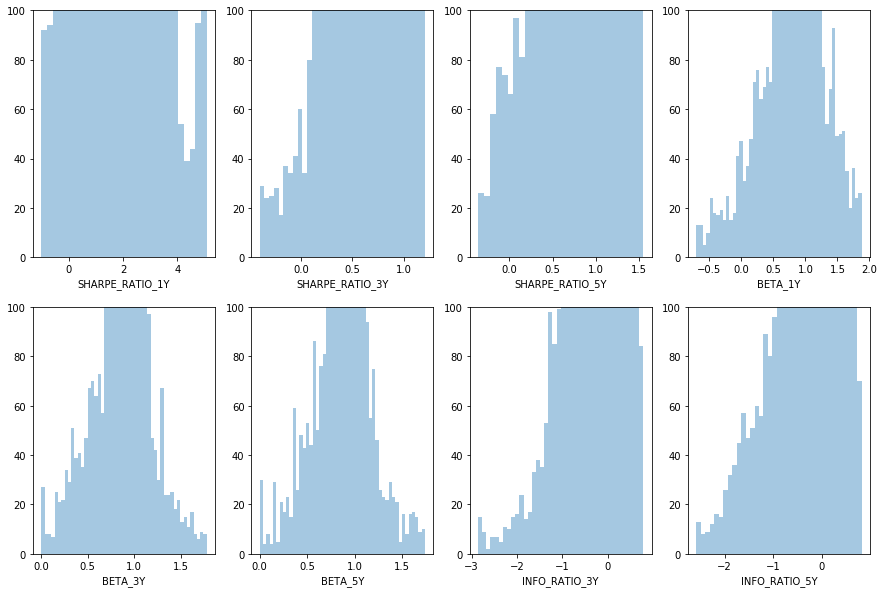

In [158]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,10))
for i, column in enumerate(numerical_columns):
    ax = sns.distplot(fund_2[column].dropna(), ax=axes[i//4,i%4], kde = False)
    ax.set(ylim = (0, 100))

In [159]:
fund_2.isnull().sum()/fund_2.count()

SHARECLASS_ID      0.000000
SHARECLASS_NAME    0.000000
FUND_NAME          0.000000
CATEGORY           0.000000
SHARPE_RATIO_1Y    0.113547
SHARPE_RATIO_3Y    0.113020
SHARPE_RATIO_5Y    0.110744
BETA_1Y            0.135027
BETA_3Y            0.356580
BETA_5Y            0.356580
INFO_RATIO_3Y      0.357363
INFO_RATIO_5Y      0.361025
dtype: float64

#### Observation:

After we remove some 'outliers', null entries % of total increases and data become sparser. 

## Creating a dataframe to upload into database

#### Observations:

From our analysis, it is clear that both Fund Data (1) and Fund Data (2) use SHARECLASS_ID as unique identifer. The two dataframe also contain same columns of SHARECLASS_NAME, FUND_NAME and CATEGORY.  

Thus, it will be ideal to combine the two dataframes before we upload a single data table into database. This will help increase the database operation efficiency when later on we query this table. We will use the SHARECLASS_ID as our primary key.

Since Fund Data (2) has more SHARECLASS_ID than Fund Data (1), we will use all SHARECLASS_ID from Fund Data (2).

In [160]:
#filter out columns from fund_1 to merge with fund_2 
fund_1_col_to_keep = [x for x in fund_1.columns if not x in ['SHARECLASS_NAME','FUND_NAME','MSTAR_BROAD_CATEGORY']]
fund_1_to_merge = fund_1[fund_1_col_to_keep].copy()

In [161]:
#merge fund_2 and fund_1
fund_merged = fund_2.merge(fund_1_to_merge, how = 'left', \
                                       left_on = 'SHARECLASS_ID', \
                                       right_on = 'SHARECLASS_ID')


In [162]:
# reorganize the columns. Object type first followed by numerical types.
obj_column = [x for x in fund_merged.columns if fund_merged[x].dtype == 'object']
num_column = [x for x in fund_merged.columns if x not in fund_merged[obj_column]]
fund_merged = fund_merged[obj_column + num_column]
fund_merged.reset_index(inplace = True)
fund_merged.rename(columns = {'index': 'id'}, inplace = True)

In [163]:
# save cleaned data as csv for uploading into our database.
fund_merged.to_csv('cleaned_fund_data.csv', index = False)

## Risk and Return Analysis  

In [164]:
# map RETURN_NET_1Y, 3Y AND 5Y from Fund Data (1) to Fund Data (2)
fund_analysis = fund_2.merge(fund_1[['SHARECLASS_ID', 'RETURN_NET_1Y', 'RETURN_NET_3Y', 'RETURN_NET_5Y']], \
                      how = 'left', \
                      left_on = 'SHARECLASS_ID', \
                      right_on = 'SHARECLASS_ID')


In [165]:
#calculate volatility for each funds using return and Sharpe Ratio
#compute average annual return for 3yr and 5yr first

fund_analysis['RETURN_NET_3Y_ANNUAL'] = fund_analysis['RETURN_NET_3Y'].apply(lambda x: ((x/100 + 1) ** (1/3) - 1)*100)
fund_analysis['RETURN_NET_5Y_ANNUAL'] = fund_analysis['RETURN_NET_5Y'].apply(lambda x: ((x/100 + 1) ** (1/5) - 1)*100)

fund_analysis['VOL_1Y']= fund_analysis['RETURN_NET_1Y'] / fund_analysis['SHARPE_RATIO_1Y']
fund_analysis['VOL_3Y']= fund_analysis['RETURN_NET_3Y_ANNUAL']/ fund_analysis['SHARPE_RATIO_3Y']
fund_analysis['VOL_5Y']= fund_analysis['RETURN_NET_5Y_ANNUAL'] / fund_analysis['SHARPE_RATIO_5Y']


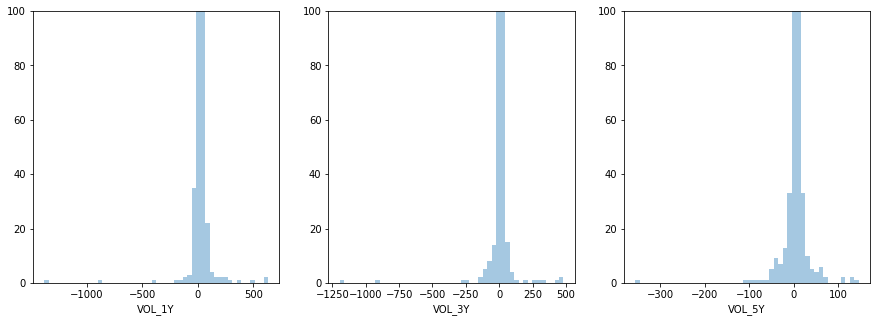

In [166]:
#check distribution of volatilities.

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for i, column in enumerate(['VOL_1Y','VOL_3Y','VOL_5Y']):
    ax = sns.distplot(fund_analysis[column].replace([np.inf,-np.inf],np.nan).dropna(), ax=axes[i], kde = False)
    ax.set(ylim = (0, 100))

#### Obervation:

Volatilities should always be positive. The fact that some are negative shows there could be some inconsistency between return and sharp ratios.


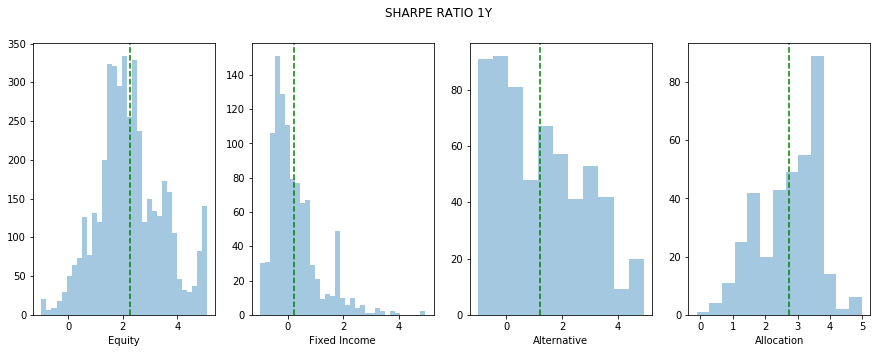

In [167]:
#check 1y sharp ratio by category
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
fig.suptitle('SHARPE RATIO 1Y')
for i, fund_class in enumerate(fund_analysis['CATEGORY'].unique()):
    ax = sns.distplot(fund_analysis[fund_analysis['CATEGORY'] == fund_class]['SHARPE_RATIO_1Y'].dropna(), ax=axes[i], kde = False)
    ax.set_xlabel(fund_class)
    ax.axvline(fund_analysis[fund_analysis['CATEGORY'] == fund_class]['SHARPE_RATIO_1Y'].dropna().mean(), linestyle = '--', color = 'g')

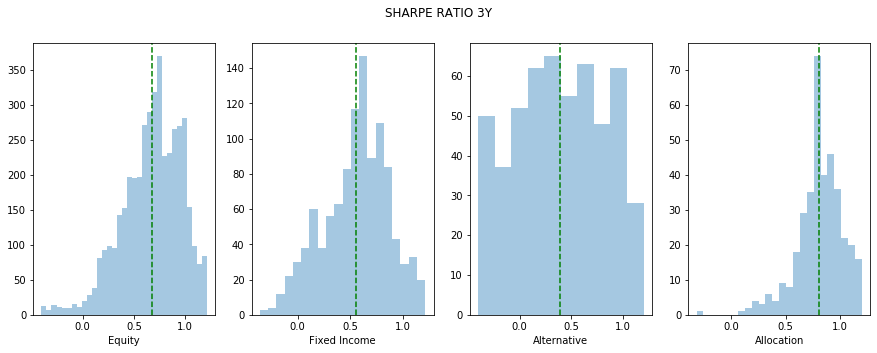

In [168]:
#check 3y sharp ratio by category
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
fig.suptitle('SHARPE RATIO 3Y')
for i, fund_class in enumerate(fund_analysis['CATEGORY'].unique()):
    ax = sns.distplot(fund_analysis[fund_analysis['CATEGORY'] == fund_class]['SHARPE_RATIO_3Y'].dropna(), ax=axes[i], kde = False)
    ax.set_xlabel(fund_class)
    ax.axvline(fund_analysis[fund_analysis['CATEGORY'] == fund_class]['SHARPE_RATIO_3Y'].dropna().mean(), linestyle = '--', color = 'g')

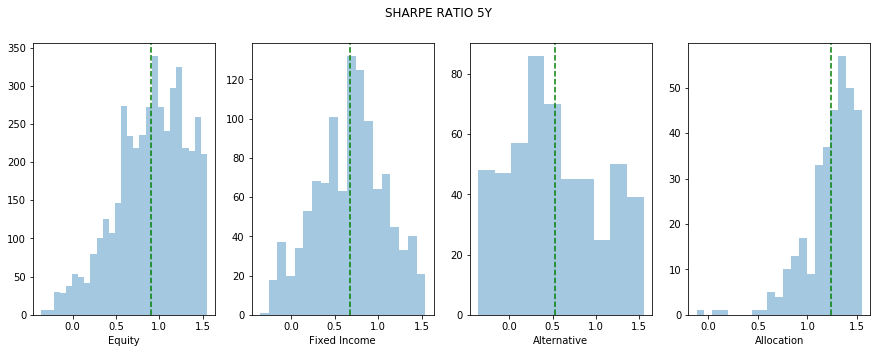

In [169]:
#check 3y sharp ratio by category
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
fig.suptitle('SHARPE RATIO 5Y')
for i, fund_class in enumerate(fund_analysis['CATEGORY'].unique()):
    ax = sns.distplot(fund_analysis[fund_analysis['CATEGORY'] == fund_class]['SHARPE_RATIO_5Y'].dropna(), ax=axes[i], kde = False)
    ax.set_xlabel(fund_class)
    ax.axvline(fund_analysis[fund_analysis['CATEGORY'] == fund_class]['SHARPE_RATIO_5Y'].dropna().mean(), linestyle = '--', color = 'g')

#### Observation:

It is clear that if the Sharpe ratios are calculated correctly, allocation funds on average have much better performance than all the other types over 1yr, 3yr and 5yr horizones. 

Equity funds are probably ranked the 2nd in terms of average performance. 

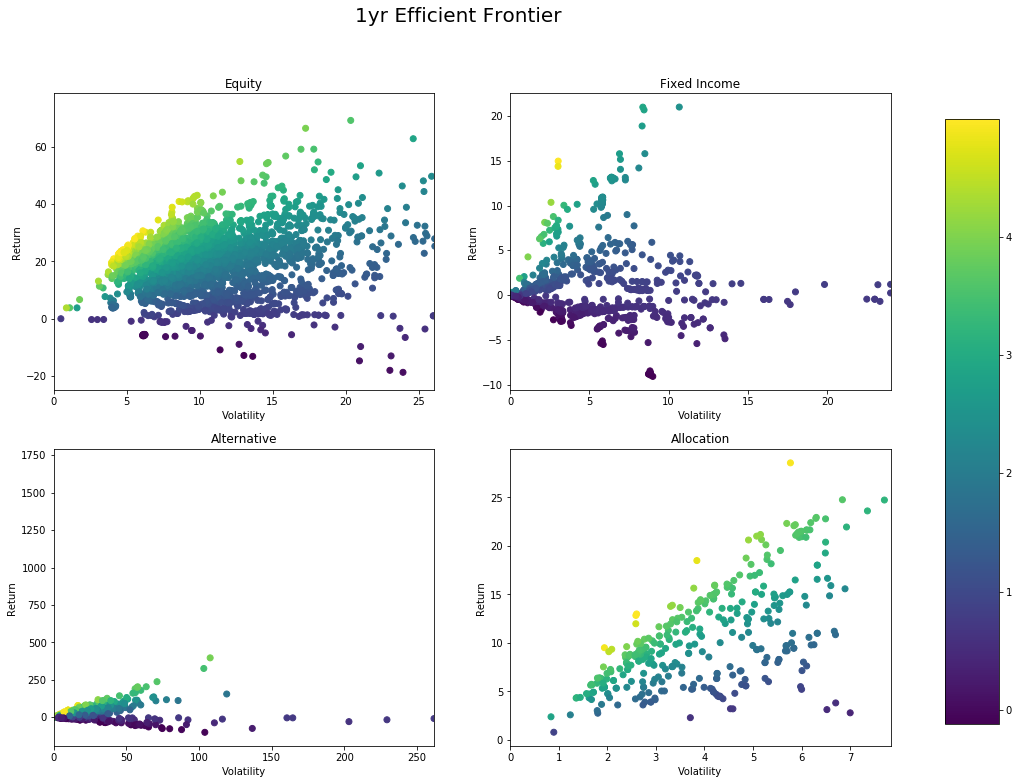

In [170]:
#1yr return/risk efficient frontier across different categories.

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
fig.suptitle('1yr Efficient Frontier', fontsize = 20)
for i, fund_class in enumerate(fund_analysis['CATEGORY'].unique()):
    chart = axes[i//2][i%2].scatter(fund_analysis[fund_analysis['CATEGORY'] == fund_class]['VOL_1Y'], \
                            fund_analysis[fund_analysis['CATEGORY'] == fund_class]['RETURN_NET_1Y'], \
                            c=fund_analysis[fund_analysis['CATEGORY'] == fund_class]['SHARPE_RATIO_1Y'], cmap='viridis')
    #axes[i//2][i%2].colorbar(label='Sharpe Ratio')
    axes[i//2][i%2].set_xlabel('Volatility')
    axes[i//2][i%2].set_ylabel('Return')
    axes[i//2][i%2].set_xlim(0, fund_analysis[fund_analysis['CATEGORY'] == fund_class]['VOL_1Y'].quantile(0.99))
    axes[i//2][i%2].set_title(fund_class)
    
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.colorbar(chart, cax = cbar_ax)


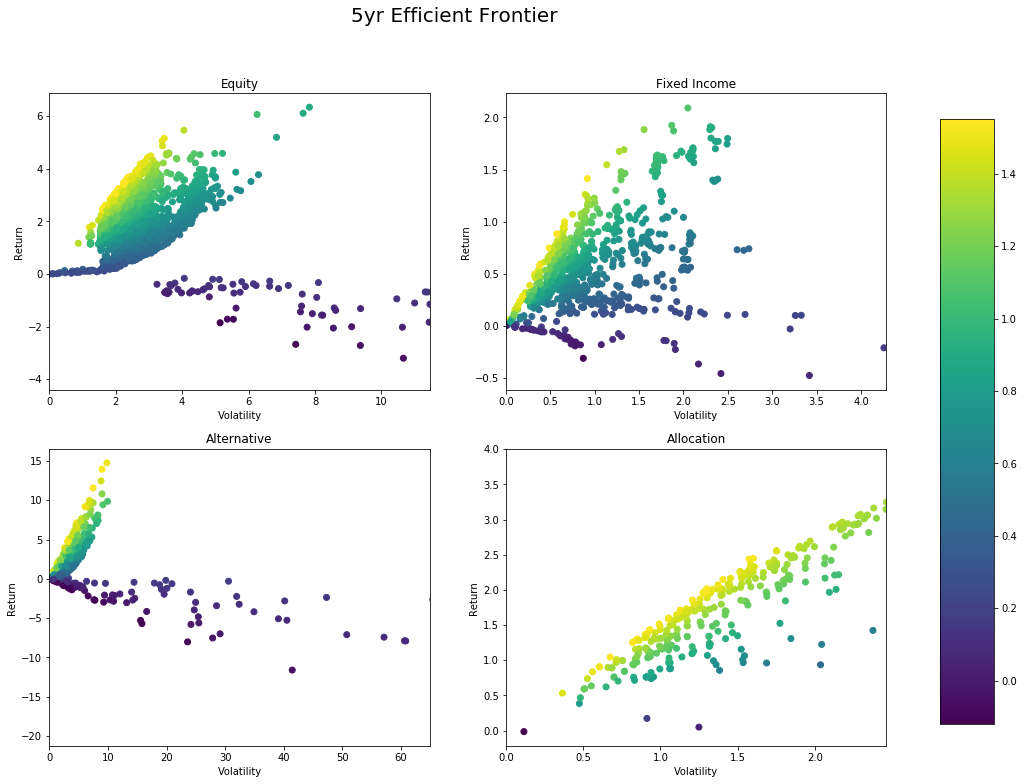

In [171]:
#5yr return/risk efficient frontier across different categories.

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
fig.suptitle('5yr Efficient Frontier', fontsize = 20)
for i, fund_class in enumerate(fund_analysis['CATEGORY'].unique()):
    chart = axes[i//2][i%2].scatter(fund_analysis[fund_analysis['CATEGORY'] == fund_class]['VOL_5Y'], \
                            fund_analysis[fund_analysis['CATEGORY'] == fund_class]['RETURN_NET_5Y_ANNUAL'], \
                            c=fund_analysis[fund_analysis['CATEGORY'] == fund_class]['SHARPE_RATIO_5Y'], cmap='viridis')
    #axes[i//2][i%2].colorbar(label='Sharpe Ratio')
    axes[i//2][i%2].set_xlabel('Volatility')
    axes[i//2][i%2].set_ylabel('Return')
    axes[i//2][i%2].set_xlim(0, fund_analysis[fund_analysis['CATEGORY'] == fund_class]['VOL_5Y'].quantile(0.99))
    axes[i//2][i%2].set_title(fund_class)
    
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.colorbar(chart, cax = cbar_ax)


#### Observations:

These efficient frontier plots show a very similar story as our Sharpe distributions. Most of allocation funds are very close to the efficient frontier.

For equity, fixed income and alternatives, they all have some funds which have poor returns but bear significant volatilities, as demostrated by dots scattered across bottom right. 